In [1]:
#import libraries
import sys
import numpy
import sklearn
import pandas
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy: 2.0.2
Sklearn: 1.6.1
Pandas: 2.2.2


In [2]:
# import the uci Molecular Biology (Promoter Gene Sequences) Data Set
import numpy as np
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)
print(data.iloc[0])

Class                                                       +
id                                                        S10
Sequence    \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
Name: 0, dtype: object


In [3]:
print(data.iloc[5])

Class                                                       +
id                                                     MALEFG
Sequence    \taggggcaaggaggatggaaagaggttgccgtataaagaaactag...
Name: 5, dtype: object


In [4]:
# Building our Dataset by creating a custom Pandas DataFrame
# Each column in a DataFrame is called a Series. Lets start by making a series for each column.
classes = data.loc[:, 'Class']
print(classes[:5])

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object


In [5]:
# generate list of DNA sequences
sequences = list(data.loc[:, 'Sequence'])
dataset = {}
# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
# split into nucleotides, remove tab characters
  nucleotides = list(seq)
  nucleotides = [x for x in nucleotides if x != '\t']
  # append class assignment
  nucleotides.append(classes[i])
  # add to dataset
  dataset[i] = nucleotides
  print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']
['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']
['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']
['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', '

In [6]:
# Turn dataset into pandas DataFrame
dframe = pd.DataFrame(dataset)
print(dframe)

   0   1   2   3   4   5   6   7   8   9    ... 96  97  98  99  100 101 102  \
0    t   t   g   a   t   a   c   t   c   t  ...   c   c   t   a   g   c   g   
1    a   g   t   a   c   g   a   t   g   t  ...   c   g   a   g   a   c   t   
2    c   c   a   t   g   g   g   t   a   t  ...   g   c   t   a   g   t   a   
3    t   t   c   t   a   g   g   c   c   t  ...   a   t   g   g   a   c   t   
4    a   a   t   g   t   g   g   t   t   a  ...   g   a   a   g   g   a   t   
5    g   t   a   t   a   c   g   a   t   a  ...   t   g   c   g   c   a   c   
6    c   c   g   g   a   a   g   c   a   a  ...   a   g   c   t   a   t   t   
7    a   c   a   a   t   a   t   a   a   t  ...   g   a   g   g   t   g   c   
8    a   t   g   t   t   g   g   a   t   t  ...   a   c   a   t   g   g   a   
9    t   g   a   g   a   g   g   a   a   t  ...   c   t   a   a   t   c   a   
10   a   a   a   t   a   a   a   a   t   c  ...   c   t   c   c   c   c   c   
11   c   c   c   g   c   g   g   c   a   c  ...   c 

In [7]:
# transpose the DataFrame
df = dframe.transpose()
print(df.iloc[:5])

  0  1  2  3  4  5  6  7  8  9   ... 48 49 50 51 52 53 54 55 56 57
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t  +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a  +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g  +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c  +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g  +

[5 rows x 58 columns]


In [8]:
# for clarity, lets rename the last dataframe column to class
df.rename(columns = {57: 'Class'}, inplace = True)
print(df.iloc[:5])

   0  1  2  3  4  5  6  7  8  9  ... 48 49 50 51 52 53 54 55 56 Class
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t     +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a     +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g     +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c     +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g     +

[5 rows x 58 columns]


In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,t,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [10]:
# describe does not tell us enough information since the attributes are t ext Lets record value counts for each sequence
series = []
for name in df.columns:
  series.append(df[name].value_counts())
info = pd.DataFrame(series)
details = info.transpose()
print(details)

   count  count  count  count  count  count  count  count  count  count  ...  \
t   38.0   26.0   27.0   26.0   22.0   24.0   30.0   32.0   32.0   28.0  ...   
c   27.0   22.0   21.0   30.0   19.0   18.0   21.0   20.0   22.0   22.0  ...   
a   26.0   34.0   30.0   22.0   36.0   42.0   38.0   34.0   33.0   36.0  ...   
g   15.0   24.0   28.0   28.0   29.0   22.0   17.0   20.0   19.0   20.0  ...   
+    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
-    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   

   count  count  count  count  count  count  count  count  count  count  
t   21.0   22.0   23.0   33.0   35.0   30.0   23.0   29.0   34.0    NaN  
c   36.0   42.0   31.0   32.0   21.0   32.0   29.0   29.0   17.0    NaN  
a   23.0   24.0   28.0   27.0   25.0   22.0   26.0   24.0   27.0    NaN  
g   26.0   18.0   24.0   14.0   25.0   22.0   28.0   24.0   28.0    NaN  
+    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   53

In [12]:
# Unfortunately, we can't run machine learning algorithms on the data in␣ 'String' formats. As a result, we need to switch
# it to numerical data. This can easily be accomplished using the pd.get_dummies() function
numerical_df = pd.get_dummies(df)
numerical_df.iloc[:5]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [13]:
numerical_df.iloc[:60]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
5,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,True,False
6,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
7,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
8,False,True,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,True,True,False
9,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False


In [14]:
# We don't need both class columns. Lets drop one then and remane the other to simply 'Class'
df = numerical_df.drop(columns=['Class_-'])
df.rename(columns ={'Class_+': 'Class'}, inplace=True)
print(df.iloc[:5])

     0_a    0_c    0_g    0_t    1_a    1_c    1_g    1_t    2_a    2_c  ...  \
0  False  False  False   True   True  False  False  False  False   True  ...   
1  False  False  False   True  False  False   True  False  False   True  ...   
2  False  False   True  False  False  False  False   True   True  False  ...   
3   True  False  False  False   True  False  False  False  False  False  ...   
4  False  False  False   True  False   True  False  False  False  False  ...   

    54_t   55_a   55_c   55_g   55_t   56_a   56_c   56_g   56_t  Class  
0  False  False  False   True  False  False  False  False   True   True  
1  False   True  False  False  False   True  False  False  False   True  
2  False  False   True  False  False  False  False   True  False   True  
3  False  False  False  False   True  False   True  False  False   True  
4   True   True  False  False  False  False  False   True  False   True  

[5 rows x 229 columns]


In [15]:
# We train the model by splitting into train set of 0.8 and test set of 0.2
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape

(106, 228)

In [16]:
# Model implentation and Evaluation
models = {
    'AD': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'MLP': MLPClassifier(),
    'SVC_linear': SVC(kernel='linear'),
    'SVC_rbf': SVC(kernel='rbf'),
    'SVC_sigmoid': SVC(kernel='sigmoid')
}

AD - Accuracy: 0.9545454545454546
AD - Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.91      0.95        11
        True       0.92      1.00      0.96        11

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22



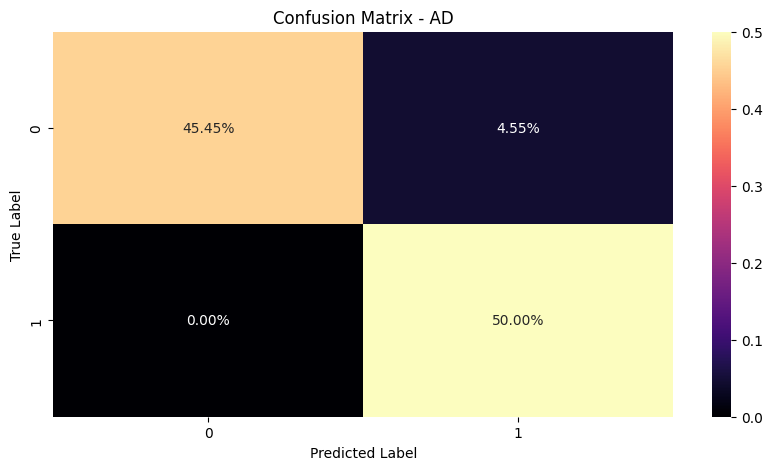

KNN - Accuracy: 0.6818181818181818
KNN - Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.45      0.59        11
        True       0.62      0.91      0.74        11

    accuracy                           0.68        22
   macro avg       0.73      0.68      0.66        22
weighted avg       0.73      0.68      0.66        22



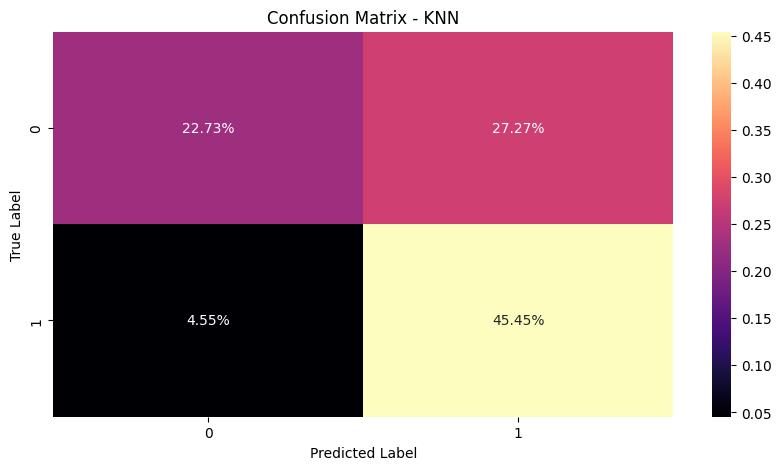

DT - Accuracy: 0.7272727272727273
DT - Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.45      0.62        11
        True       0.65      1.00      0.79        11

    accuracy                           0.73        22
   macro avg       0.82      0.73      0.71        22
weighted avg       0.82      0.73      0.71        22



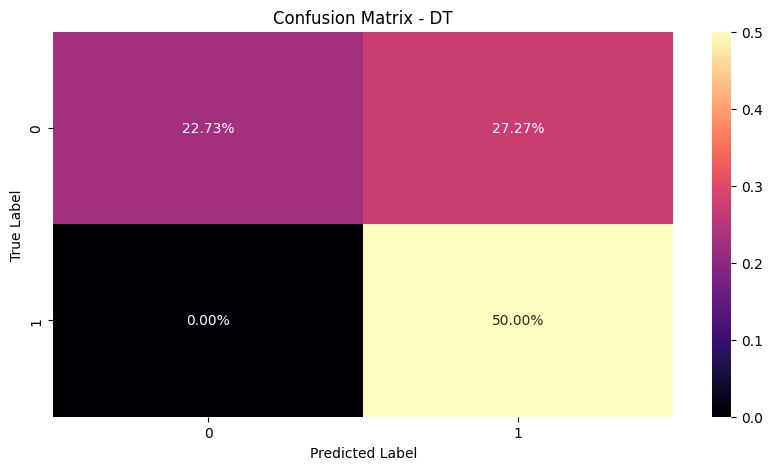

NB - Accuracy: 0.9545454545454546
NB - Classification Report:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96        11
        True       1.00      0.91      0.95        11

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22



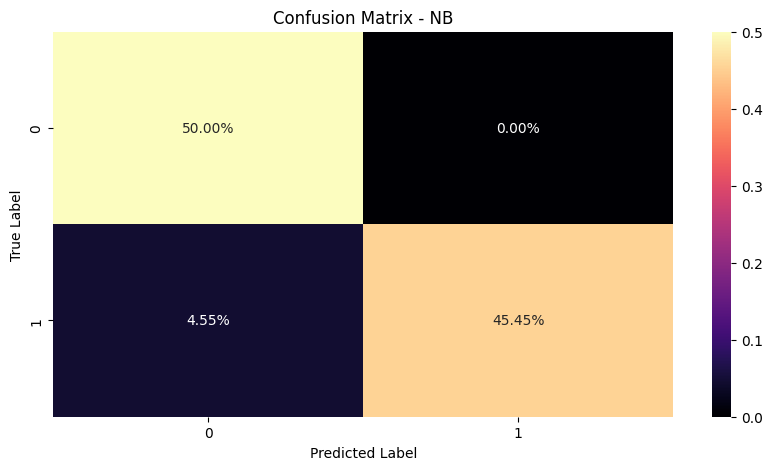

MLP - Accuracy: 0.9090909090909091
MLP - Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.82      0.90        11
        True       0.85      1.00      0.92        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22



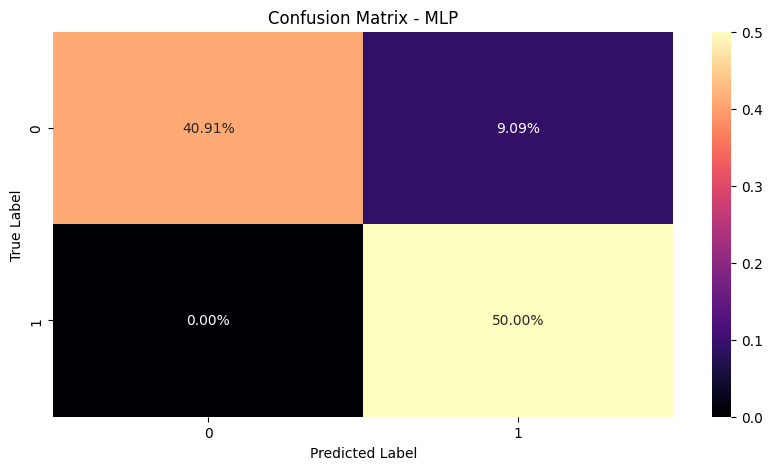

SVC_linear - Accuracy: 0.8636363636363636
SVC_linear - Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.73      0.84        11
        True       0.79      1.00      0.88        11

    accuracy                           0.86        22
   macro avg       0.89      0.86      0.86        22
weighted avg       0.89      0.86      0.86        22



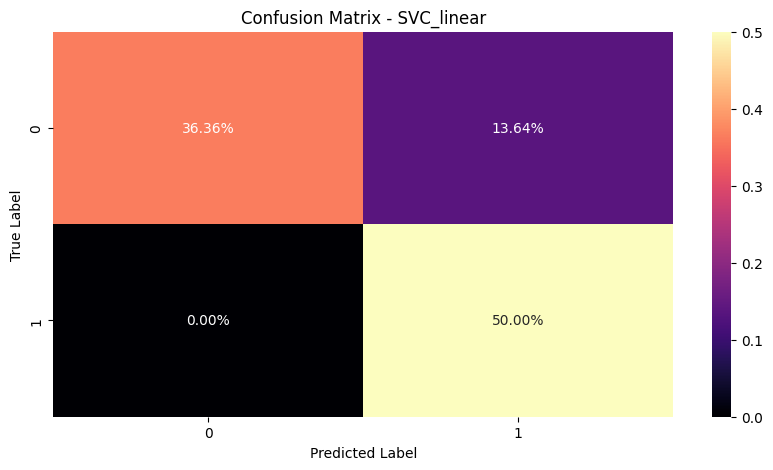

SVC_rbf - Accuracy: 0.9090909090909091
SVC_rbf - Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.82      0.90        11
        True       0.85      1.00      0.92        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22



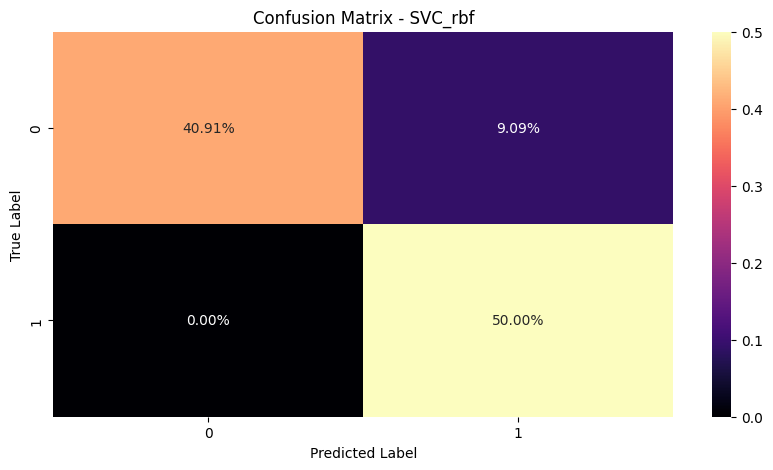

SVC_sigmoid - Accuracy: 0.9090909090909091
SVC_sigmoid - Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.82      0.90        11
        True       0.85      1.00      0.92        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22



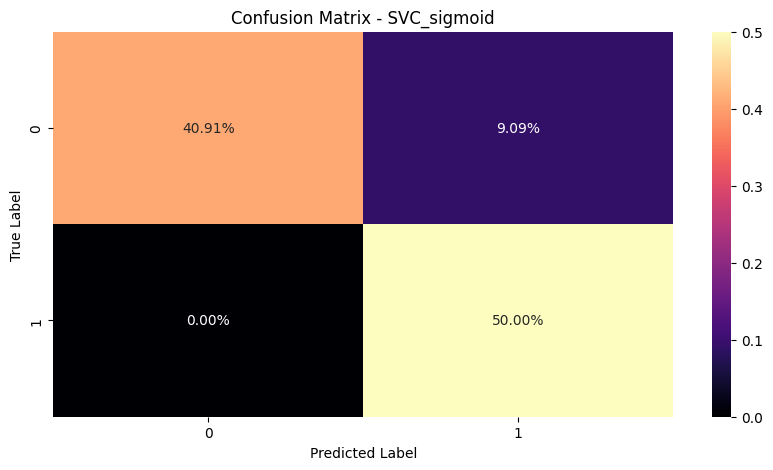

In [19]:
# Train models and generated classification reports
for model_name, model in models.items():

  # Fit the model
  model.fit(X_train, y_train)

  # Make predictions
  y_pred = model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'{model_name} - Accuracy: {accuracy}')
  print(f'{model_name} - Classification Report:\n{report}')

  # Create and display confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(10,5))
  sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='magma')
  plt.title(f"Confusion Matrix - {model_name}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

In [20]:
# summary table comparing the performance metrics (accuracy, precision, recall, F1-score) of all models.
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rows = []
for name, clf in models.items():
    y_pred = clf.predict(X_test)
    rows.append({
        "Model": name,
        "Accuracy":  accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall":    recall_score(y_test, y_pred, zero_division=0),
        "F1-Score":  f1_score(y_test, y_pred, zero_division=0),
    })

results_df = pd.DataFrame(rows).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print(results_df)

         Model  Accuracy  Precision    Recall  F1-Score
0           AD  0.954545   0.916667  1.000000  0.956522
1           NB  0.954545   1.000000  0.909091  0.952381
2      SVC_rbf  0.909091   0.846154  1.000000  0.916667
3          MLP  0.909091   0.846154  1.000000  0.916667
4  SVC_sigmoid  0.909091   0.846154  1.000000  0.916667
5   SVC_linear  0.863636   0.785714  1.000000  0.880000
6           DT  0.727273   0.647059  1.000000  0.785714
7          KNN  0.681818   0.625000  0.909091  0.740741


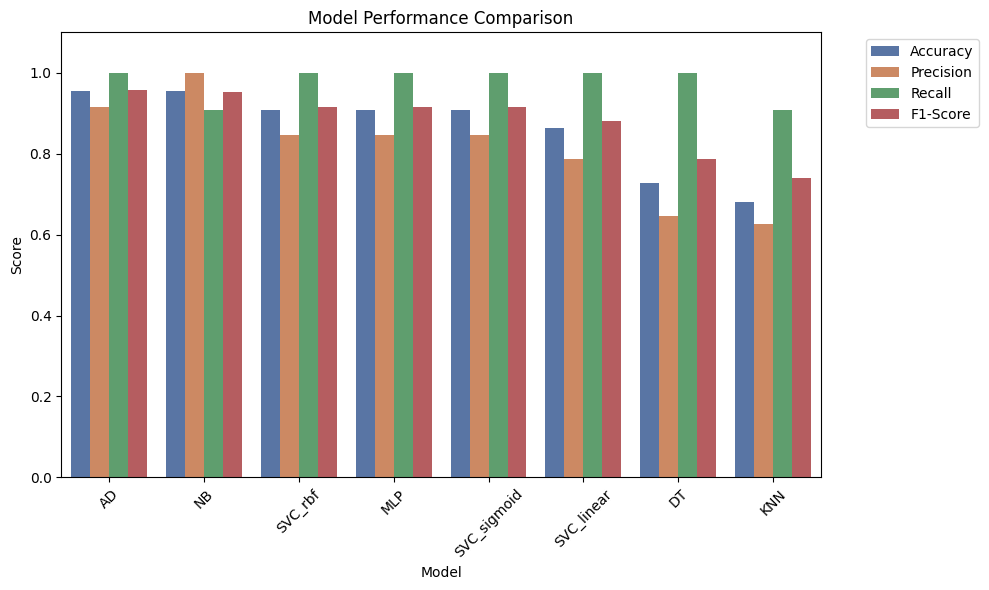

In [21]:
# We plot a grouped bar chart to visually compare models:
plt.figure(figsize=(10,6))
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette='deep')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

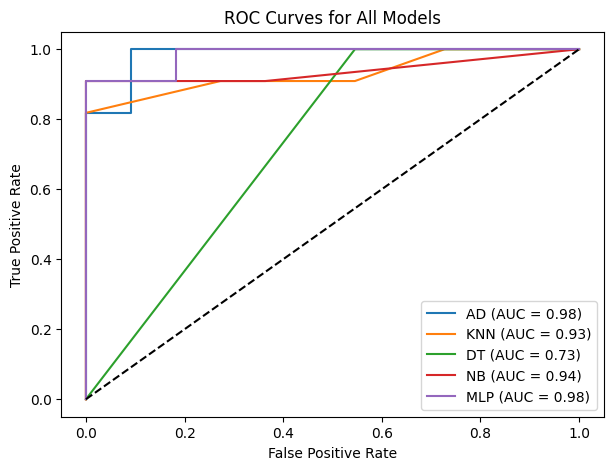

In [22]:
# Other visualization for analysisi: ROC
# The ROC curve shows how well each model separates positive and negative classes.
# The area under the curve (AUC) indicates performance: higher values mean better classification.
# This helps evaluate model robustness beyond simple accuracy.

from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(7,5))

for name, model in models.items():
    # Only models that support probability outputs can generate ROC curves
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

# Plot diagonal line for reference (random guessing)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Analysis and Conclusion**

After comparing all the models, the AdaBoost (AD) and Gaussian Naive Bayes (NB) classifiers showed the best overall performance for DNA classification. Both reached an accuracy of about 95.45%, with high precision and F1-scores above 0.95, showing that they could accurately identify DNA sequence classes with minimal misclassification. Their ROC curves also confirmed this strength, with AUC values of 0.98 and 0.94 respectively, indicating excellent separation between true and false classifications. The SVC models using RBF and Sigmoid kernels followed closely, maintaining strong recall and balanced precision, which suggests consistent generalization across different DNA sequence patterns. The Decision Tree (DT) and K-Nearest Neighbors (KNN) models performed less effectively, with accuracies of 72% and 68%, possibly due to overfitting or sensitivity to small nucleotide variations. The Multi-Layer Perceptron (MLP) achieved 91% accuracy, showing good predictive ability but requiring longer training time. In conclusion, AdaBoost and Gaussian Naive Bayes proved to be the most stable and efficient models for DNA classification, combining high accuracy, robustness, and computational efficiency.